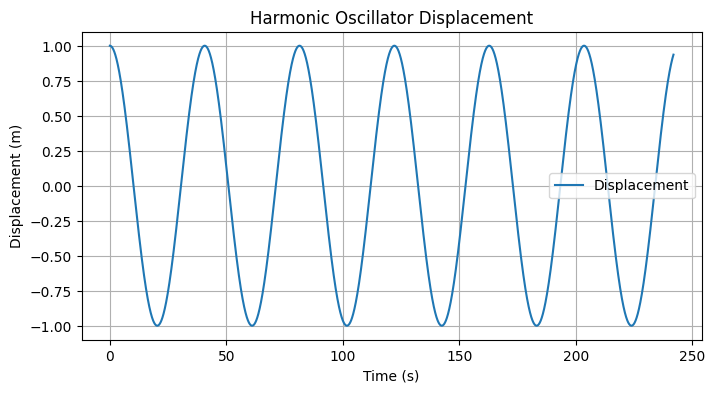

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# constants for the harmonic oscillator
m = 42.0  # mass (in kg)
k = 1.0  # spring constant (in N/m)
omega = np.sqrt(k / m)  # angular frequency (in rad/s)

# time parameters
t_max = 242  # maximum time (in seconds)
dt = 0.01  # time step (in seconds)
t = np.arange(0, t_max, dt)  # time array

# initial conditions
x0 = 1.0  # initial displacement (in meters)
v0 = 0.0  # initial velocity (in m/s)

# displacement as a function of time for a harmonic oscillator
x = x0 * np.cos(omega * t)

# plotting the displacement over time
plt.figure(figsize=(8, 4))
plt.plot(t, x, label='Displacement')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Harmonic Oscillator Displacement')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

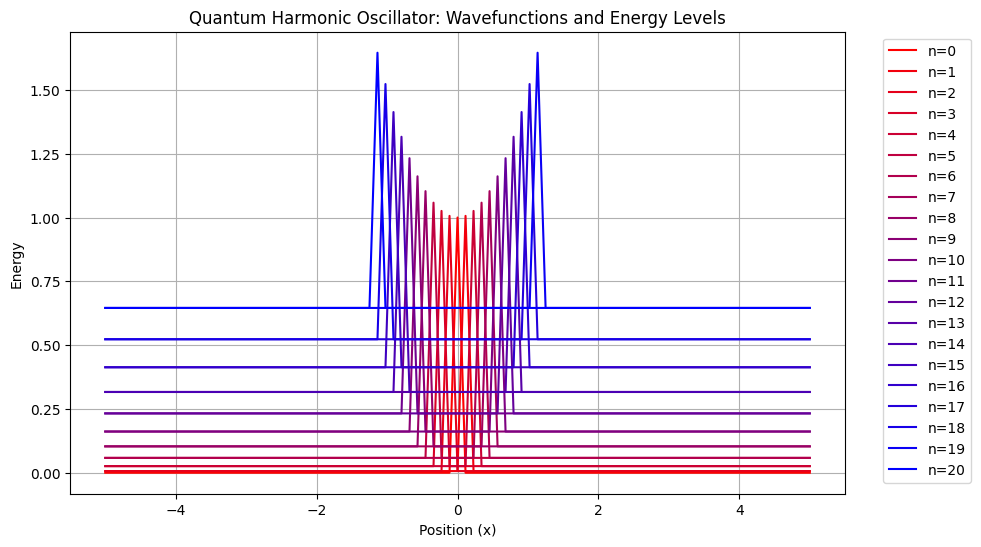

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.constants import hbar
from scipy.linalg import eigh_tridiagonal

# Constants
m = 1.0  # mass of the oscillator
omega = 1.0  # angular frequency

# Quantum parameters
n_states = 21  # number of energy states to consider
n_points = 89  # number of points in position space

# Position space
x = np.linspace(-5.0, 5.0, n_points)
dx = x[1] - x[0]  # spacing between points

# Constructing the Hamiltonian matrix using finite difference method
diagonal = hbar**2 / (2 * m * dx**2) + 0.5 * m * omega**2 * x**2
off_diagonal = -hbar**2 / (2 * m * dx**2) * np.ones(n_points - 1)
energies, wavefunctions = eigh_tridiagonal(diagonal, off_diagonal)

# Plotting the energy levels and wavefunctions
plt.figure(figsize=(10, 6))
colors = [(1, 0, 0), (0, 0, 1)]  # Red to Blue
n_bins = 100
cmap_name = 'energy_gradient'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
plt.figure(figsize=(10, 6))
for n in range(n_states):
    # Normalize the energy levels between 0 and 1 to map to the colormap
    color = cm(n / (n_states - 1))
    plt.plot(x, wavefunctions[:, n]**2 + energies[n], label=f'n={n}', color=color)
plt.xlabel('Position (x)')
plt.ylabel('Energy')
plt.title('Quantum Harmonic Oscillator: Wavefunctions and Energy Levels')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid(True)
plt.show()

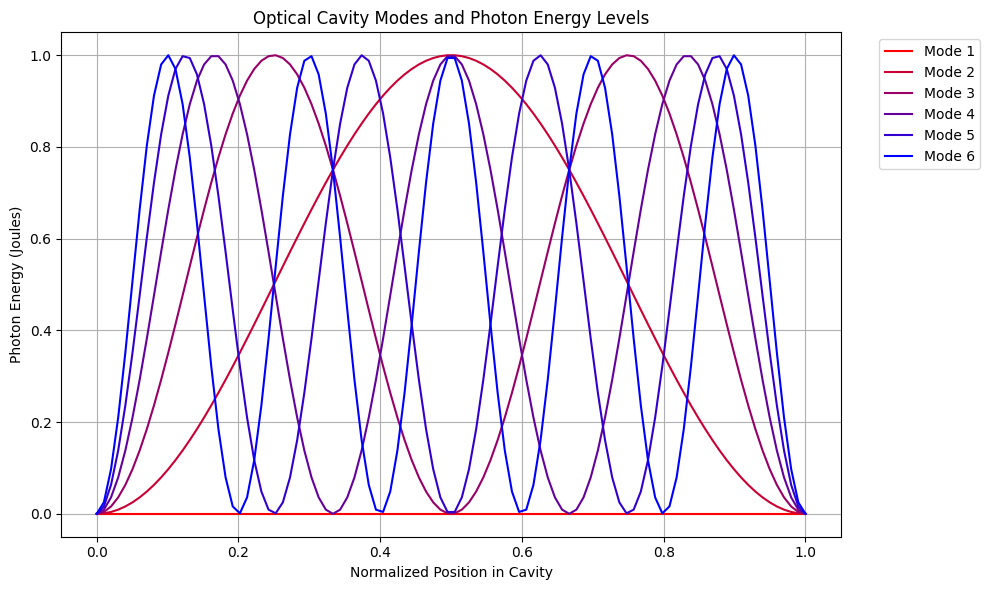

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.constants import h, c

# Parameters for the optical cavity
L = 1.0e-2  # Length of the optical cavity in meters
n_modes = 6  # number of cavity modes to consider

# Mode frequencies (assuming a simple cavity with evenly spaced modes)
frequencies = np.linspace(c / (2 * L), c / (2 * L) * n_modes, n_modes)

# Energy levels for the photons in each mode
energies = h * frequencies

# Normalized position within the cavity from 0 to 1
positions = np.linspace(0, 1, 100)

# Plotting the energy levels and mode intensity profiles
plt.figure(figsize=(10, 6))
colors = [(0, 0, 1), (1, 0, 0)]  # Red to Blue
n_bins = 100
cmap_name = 'energy_gradient'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
for n in range(n_modes):
    # Mode intensity profiles (standing wave patterns)
    # Lets assume the intensity profile is sinusoidal
    mode_intensity = np.sin(n * np.pi * positions)**2
    # Normalize the energy levels between 0 and 1 to map to the colormap
    color = cm(n / (n_modes - 1))
    # Offset each mode intensity profile by its energy to separate them visually
    plt.plot(positions, mode_intensity + energies[n], label=f'Mode {n+1}', color=color)
plt.xlabel('Normalized Position in Cavity')
plt.ylabel('Photon Energy (Joules)')
plt.title('Optical Cavity Modes and Photon Energy Levels')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()